In [2]:
import numpy as np

with open("data1.raw.bin", "rb") as f:
    data = np.fromfile(f, dtype="complex128")

scaled_data = np.log1p(np.abs(data)) #Data is scaled

print(scaled_data[1:10])
print(scaled_data.shape)

[1.03112038e-303 5.35532242e+002 6.98350749e-251 3.85310632e+002
 4.14468025e+002 1.89852206e+002 2.36987261e+002 1.53843422e+002
 1.64543629e-108]
(7372955,)


C:\Users\91766\AppData\Local\Temp\ipykernel_10116\1835096360.py:6: RuntimeWarning: overflow encountered in absolute
  scaled_data = np.log1p(np.abs(data)) #Data is scaled


In [3]:
scaled_data = scaled_data[155:] #Removed first 155 values to reshape into 450 frames

#As per the Given information about radar it records about 16384 values per instance
reshaped_data = scaled_data.reshape((450,16384)) 

In [4]:
#duration of data recorded is 60 seconds

threshold = 600 #Threshold identified from visualizing the frame data 

count_greater_than_600 = np.sum(reshaped_data > threshold, axis=1) # For each frame, number the points crossed threshold was identified

# Found mean for every 5 values of threshold because average breath is about 12 to 20 
# For every 3 to 5 sec once the chest of the person will get move front and back
# so we can combine upto 7 frames and nearest value that divise 450 is 5 so we took mean of every 5 frames
mean_values = np.mean(count_greater_than_600.reshape(-1, 5), axis=1) 

print("Mean Values Array:")
print(mean_values)
print(len(mean_values))


Mean Values Array:
[1676.4 1703.6 1669.8 1662.2 1708.4 1783.8 1617.  1567.4 1662.8 1544.8
 1510.4 1363.2 1392.4 1418.  1363.2 1542.  1721.2 1690.  1579.6 1521.2
 1631.4 1784.8 1812.  1892.6 2012.2 2196.4 2214.6 2216.  2171.  2041.6
 2021.6 1996.8 2126.  2011.2 1971.2 2043.6 1908.8 1881.  2108.8 2042.4
 1950.4 1958.4 1899.6 1995.2 2176.6 2101.4 2090.6 1856.6 1927.2 2252.8
 1955.2 2074.  2075.4 1989.2 1956.  2265.  2142.8 2194.2 1835.4 2092.
 2098.4 2033.4 2098.2 1949.8 1826.4 2002.6 2006.8 2062.4 1785.6 1897.4
 2120.  2101.8 1838.  1963.6 2029.6 1930.2 1849.2 1841.  1706.4 2086.8
 1819.4 1954.2 1908.6 1841.4 1935.2 2052.8 1959.  1997.  2073.6 1986.4]
90


In [5]:
import numpy as np
from scipy.signal import find_peaks

signal = mean_values

threshold = np.mean(signal)

averaged = []

for i in range(60):
    start_index = i * int(len(signal) / 60)  # Divide the total length by 60 for a 60-second interval
    end_index = start_index + int(len(signal) / 60)  # Divide the total length by 60 for a 60-second interval

    # Extract the subset of the signal within the window
    window_signal = signal[start_index:end_index]

    # Average the values within the window to get a single value
    averaged_value = np.mean(window_signal)

    # Append the averaged value to the breath rates array
    averaged.append(averaged_value)


print(len(averaged))


60


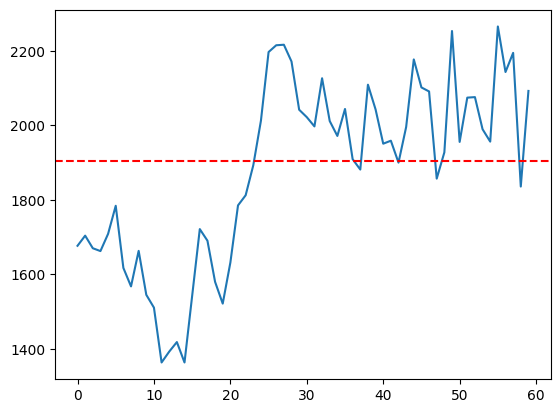

In [6]:
import matplotlib.pyplot as plt
plt.plot(averaged)
plt.axhline(y=np.mean(mean_values), color='red', linestyle='--', label='Threshold') #Mean value to find peaks
plt.show()

In [7]:
# Algorithm for finding Breath Rate
import numpy as np
from scipy.signal import find_peaks

signal = averaged
threshold = np.mean(signal) 

breath_rate_list = []

for i in range(60):
    start_index = i * 1  
    end_index = start_index + 30

    window_signal = signal[start_index:end_index]

    peaks, _ = find_peaks(window_signal, height=threshold)

    time_diffs = np.diff(peaks) / 1

    breath_rate = 60 / np.mean(time_diffs) if len(time_diffs) > 0 else 0
    breath_rate_list.append(int(np.ceil(breath_rate)))

print("Breath Rates Array:")
print(breath_rate_list) # Predicted breath rates are printed


Breath Rates Array:
[12, 11, 11, 11, 12, 10, 10, 12, 11, 11, 12, 12, 12, 12, 12, 12, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 19, 19, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 23, 23, 23, 23, 23, 24, 24, 24, 30, 30, 30, 0, 0, 0, 0, 0]


In [8]:
import numpy as np

# Thresholds are observed for heart are like between 200 to 300 from the observed data when plotted
threshold_lower = 200
threshold_upper = 300

#counted the values between the threshold
count_within_threshold = np.sum((reshaped_data > threshold_lower) & (reshaped_data < threshold_upper), axis=1)

#we took mean of every 2 frames because further reducing may effect in finding peaks 
mean_values = np.ceil(np.mean(count_within_threshold.reshape(-1, 2), axis=1))

print("Mean Values Array:")
print(mean_values)
print(len(mean_values))

Mean Values Array:
[1641. 1339. 1369. 1565. 1482. 1414. 1635. 1390. 1348. 1433. 1318. 1254.
 1350. 1321. 1193. 1319. 1280. 1230. 1372. 1202. 1360. 1474. 1358. 1378.
 1418. 1488. 1520. 1591. 1578. 1717. 1590. 1592. 1652. 1428. 1393. 1394.
 1247. 1324. 1127. 1163. 1373. 1207. 1197. 1362. 1058. 1170. 1565. 1301.
 1396. 1538. 1396. 1422. 1564. 1338. 1630. 1683. 1341. 1697. 1574. 1370.
 1406. 1439. 1411. 1439. 1409. 1489. 1374. 1349. 1432. 1493. 1313. 1435.
 1328. 1410. 1404. 1335. 1310. 1387. 1377. 1407. 1281. 1271. 1344. 1251.
 1362. 1402. 1338. 1340. 1218. 1299. 1360. 1444. 1101. 1406. 1328. 1327.
 1330. 1189. 1309. 1153. 1356. 1271. 1432. 1379. 1411. 1285. 1564. 1325.
 1162. 1339. 1250. 1357. 1332. 1365. 1334. 1130.  947. 1307. 1426. 1506.
 1172. 1449. 1443. 1300. 1099. 1001. 1319. 1311.  996. 1297. 1178. 1397.
 1418. 1359. 1420. 1467. 1466. 1126. 1138. 1286. 1437. 1322. 1532. 1168.
 1318. 1377. 1439. 1351. 1204. 1150. 1417. 1238. 1414. 1400. 1384. 1119.
 1348. 1255. 1393. 1298. 1464. 1

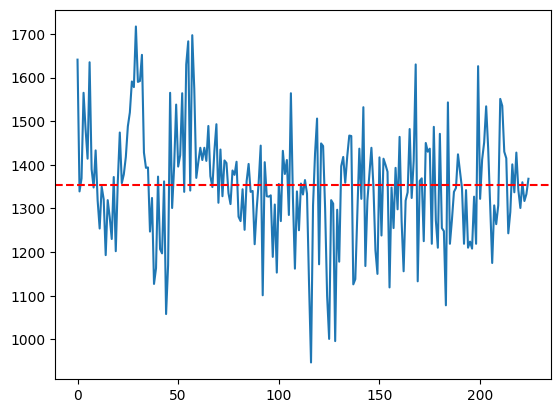

In [9]:
plt.plot(mean_values)
plt.axhline(y=np.mean(mean_values), color='red', linestyle='--', label='Threshold')
plt.show()

In [10]:
# Algorithm for heart rate estimation
import numpy as np
from scipy.signal import find_peaks

signal = mean_values
threshold = np.mean(signal)

heart_rate_list = []

frames_per_chunk = 12
chunk_duration = 2
frame_rate = 4

for i in range(0, len(signal)):
    start_index = i
    end_index = min(i + frames_per_chunk, len(signal))

    window_signal = signal[start_index:end_index]

    peaks, _ = find_peaks(window_signal, height=threshold)

    time_diffs = np.diff(peaks) / frame_rate

    heart_rate = 60 / np.mean(time_diffs) if len(time_diffs) > 0 else 0
    heart_rate_list.append(heart_rate)

print("Heart Rates Array:")
print(heart_rate_list)
print(len(heart_rate_list))


Heart Rates Array:
[80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 0, 0, 26.666666666666668, 0, 0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 53.333333333333336, 40.0, 60.0, 60.0, 120.0, 96.0, 96.0, 96.0, 90.0, 90.0, 80.0, 80.0, 80.0, 60.0, 60.0, 48.0, 60.0, 60.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 90.0, 90.0, 96.0, 96.0, 80.0, 80.0, 90.0, 90.0, 90.0, 90.0, 120.0, 120.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 120.0, 120.0, 90.0, 90.0, 90.0, 90.0, 80.0, 80.0, 120.0, 120.0, 60.0, 60.0, 40.0, 40.0, 0, 0, 40.0, 40.0, 60.0, 60.0, 120.0, 120.0, 120.0, 120.0, 120.0, 53.333333333333336, 34.285714285714285, 53.333333333333336, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 80.0, 68.57142857142857, 80.0, 68.57142857142857, 68.57142857142857, 120.0, 120.0, 120.0, 60.0, 60.0, 60.0, 60.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 0, 0, 0, 0, 0, 0, 80.0, 80.0, 80.0, 80.0, 80.0, 60.0, 60.0, 68.57142857142857, 68.57142857142857, 68.57142857142857, 120.0, 80.0, 80.0, 80.0, 80.0

In [11]:
# founded heart rate peaks but not exact heart rate
# To find that averaging is used to convert 225 values to 60 values each one per second

# Number of heart rate values to average for each output value
values_per_minute = 4  # Assuming 4 values per minute for illustration

# Calculate the number of chunks needed
num_chunks = len(heart_rate_list) // values_per_minute

# Averaging heart rate values into 60 values
averaged_heart_rate_list = []

for i in range(num_chunks):
    start_index = i * values_per_minute
    end_index = (i + 1) * values_per_minute
    
    averaged_heart_rate = np.mean(heart_rate_list[start_index:end_index])
    averaged_heart_rate_list.append(int(np.ceil(averaged_heart_rate)))

print("Averaged Heart Rates Array:")
print(averaged_heart_rate_list)

Averaged Heart Rates Array:
[80, 40, 27, 80, 59, 93, 89, 70, 62, 80, 80, 83, 91, 88, 105, 90, 105, 88, 95, 35, 35, 105, 82, 104, 120, 88, 95, 75, 105, 90, 0, 60, 70, 82, 80, 70, 100, 60, 108, 65, 83, 101, 113, 87, 61, 48, 0, 0, 45, 45, 26, 20, 84, 96, 40, 0]


In [12]:
# we have some values that are less that average heart rate we need to adjust them we need to use IMPUTATION Technique
# replacing average of left two values and right two values to the noise value
import numpy as np

heart_rate_array = averaged_heart_rate_list  

# Threshold for replacing values
threshold = 70

heart_rate_array = np.array(heart_rate_array)

for i in range(len(heart_rate_array)):
    if heart_rate_array[i] < threshold:
        # Find the indices of the two nearest greater values on the left
        left_indices = np.where(heart_rate_array[:i] > threshold)[0]
        left_indices = left_indices[-2:] if len(left_indices) >= 2 else left_indices

        # Find the indices of the two nearest greater values on the right
        right_indices = np.where(heart_rate_array[i+1:] > threshold)[0]
        right_indices = right_indices[:2] + i + 1 if len(right_indices) >= 2 else right_indices + i + 1

        # Combine the indices and calculate the average
        indices = np.concatenate((left_indices, right_indices))
        replacement_value = np.mean(heart_rate_array[indices])

        # Replace the original value with the average
        heart_rate_array[i] = replacement_value

print("Heart Rates Array after Replacement:")
print(heart_rate_array)


Heart Rates Array after Replacement:
[ 80  84  84  80  86  93  89  70  85  80  80  83  91  88 105  90 105  88
  95  92  93 105  82 104 120  88  95  75 105  90  89  85  70  82  80  70
 100  92 108  96  83 101 113  87  95  90  91  90  90  90  90  90  84  96
  90  93]


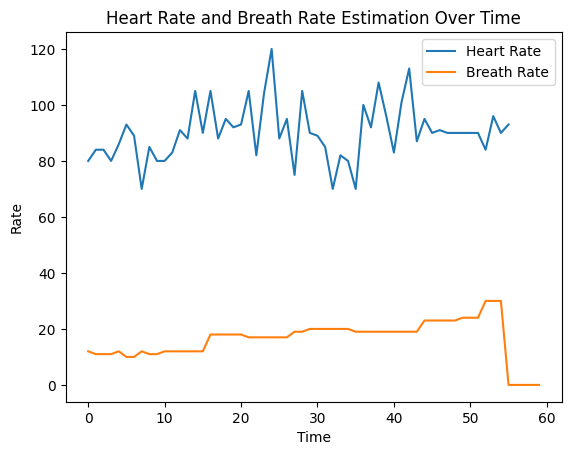

In [13]:
plt.plot( heart_rate_array, label="Heart Rate")
plt.plot( breath_rate_list, label="Breath Rate")
plt.title("Heart Rate and Breath Rate Estimation Over Time")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.legend()
plt.show()